# 4-1

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

class Dense:
    def __init__(self,n_inputs,n_neurons):
       
        self.w=np.random.randint(-2, 2, (n_inputs, n_neurons))
        self.b = np.random.randint(-2, 2, (1, n_neurons))    #b
        self.weight_history = 0
        self.bias_history = 0
    
    def forward(self,inputs):
        self.input = inputs  #p
        self.output = np.dot(inputs,self.w)+self.b
        #print(self.output)
        
    def backward(self,b_input):
        #print(type(b_input))
        #print(b_input)
        #print(type(self.w))
        #print(self.w)
        self.b_output = np.dot(b_input,self.w.T)
        self.g_w = np.dot(self.input.T,b_input)
        self.g_b = np.sum(b_input,axis=0,keepdims=True)

class Linear:
    def forward(self,inputs):
        self.input = inputs
        self.output = inputs
    def backward(self,b_input):
        self.b_output = b_input  

class Sigmoid:
    def __init__(self):
        pass
    def forward(self,inputs):
        self.input = inputs
        self.output = 1/(1+np.exp(-inputs))
    def backward(self,b_input):
        self.b_output = b_input*self.output*(1-self.output)

class ReLU:
    def __init__(self):
        pass
    
    def forward(self,inputs):
        self.output = np.maximum(0,inputs)
        self.input = inputs
    
    def backward(self,b_input):
        self.b_output = b_input
        self.b_output[self.input<=0] = 0

class SGD:
    def __init__(self,learning_rate = 0.001,momentum=0):
        self.learning_rate = learning_rate
        self.momentum = momentum
    def update(self,layer):
        if self.momentum:
            weight_update = self.momentum*layer.weight_history\
            + (1-self.momentum)*(-self.learning_rate*layer.g_w)
            layer.weight_update = weight_update
            bias_update = self.momentum*layer.weight_history\
            + (1-self.momentum)*(-self.learning_rate*layer.g_b)
            layer.bias_update = bias_update
        else:
            weight_update = - self.learning_rate*layer.g_w
            bias_update = - self.learning_rate*layer.g_b
        
        layer.w = layer.w + weight_update
        layer.b = layer.b + bias_update
    
    def discard(self,layer):
        layer.w = layer.w 
        layer.b = layer.b 

class Mean_Square_Error_loss:
    def __init__(self):
        pass
    def forward(self,y_predict,y_true):
        return np.mean((y_true-y_predict)**2,axis = 0)
    
    def backward(self,y_predict,y_true):
        self.b_output = -2*(y_true-y_predict)

p=[]
t=[]

p1=[]
t1=[]

p_test=[]
t_test=[]

p_val=[]
t_val=[]

for i in range(400):
    dataP = np.random.randint(-4,4)
    p1.append(dataP)
    
    epsilon=np.random.normal(0, 1)
    
    dataT=(16+epsilon-(dataP**2))**(1/2)
    t1.append(dataT)



p = pd.DataFrame(p1,columns =['x_train'])
t = pd.DataFrame(t1,columns =['y_train'])

for i in range(100):
    dataP = np.random.randint(-3,3)
    p_test.append(dataP)
    
    epsilon=np.random.normal(0, 1)
    
    dataT=(16+epsilon-(dataP**2))**(1/2)
    t_test.append(dataT)
        
p_test=pd.DataFrame(p_test,columns =['x_test'])
t_test=pd.DataFrame(t_test,columns =['y_test'])


#Creating validation data
for i in range(100):
    dataP = np.random.randint(0,399)
    p_val.append(p1[dataP])
    t_val.append(t1[dataP])
    
p_val=pd.DataFrame(p_val,columns =['x_val'])
t_val=pd.DataFrame(t_val,columns =['y_val'])

x_train=[]
y_train=[]

x_test=[]
y_test=[]

x_val = []
y_val = []

#Creating train data
for i in range(400):
    temp=[]
    temp.append(p['x_train'][i])
    x_train.append(temp)
    
for i in range(400):
    temp=[]
    temp.append(t['y_train'][i])
    y_train.append(temp)

#Creating test data
for i in range(100):
    temp=[]
    temp.append(p_test['x_test'][i])
    x_test.append(temp)


for i in range(100):
    temp=[]
    temp.append(t_test['y_test'][i])
    y_test.append(temp)
    
#Creating validation data
for i in range(100):
    temp=[]
    temp.append(p_val['x_val'][i])
    x_val.append(temp)


for i in range(100):
    temp=[]
    temp.append(t_val['y_val'][i])
    y_val.append(temp)
    
x_train = np.array(x_train)
y_train = np.array(y_train)

x_test = np.array(x_test)
y_test = np.array(y_test)

x_val = np.array(x_val)
y_val = np.array(y_val)


Epoch: 0
Loss for training data: [33.72955364+0.41566225j]
Loss for validation data: [272.83684449+61.7548134j]
--------------------------
Epoch: 1
Loss for training data: [12693.14479864+20504.90561768j]
Loss for validation data: [-3.25567443e+13+2.34583122e+12j]
--------------------------
Epoch: 2
Loss for training data: [-3.25579359e+38+7.13660583e+37j]
Loss for validation data: [-7.38929492e+115+5.58657475e+115j]
--------------------------
Epoch: 3
Loss for training data: [nan+nanj]
Loss for validation data: [nan+nanj]
--------------------------
Epoch: 4
Loss for training data: [nan+nanj]
Loss for validation data: [nan+nanj]
--------------------------
Epoch: 5
Loss for training data: [nan+nanj]
Loss for validation data: [nan+nanj]
--------------------------
Epoch: 6
Loss for training data: [nan+nanj]
Loss for validation data: [nan+nanj]
--------------------------
Epoch: 7
Loss for training data: [nan+nanj]
Loss for validation data: [nan+nanj]
--------------------------
Epoch: 8
Los

C:\Users\Ansar9811291\AppData\Local\Temp\ipykernel_4508\3685962073.py:59: DeprecationWarning: The Python built-in `round` is deprecated for complex scalars, and will raise a `TypeError` in a future release. Use `np.round` or `scalar.round` instead.
  loss_valid[0]=round(loss_valid[0],12)
C:\Users\Ansar9811291\AppData\Local\Temp\ipykernel_4508\3091186822.py:82: RuntimeWarning: overflow encountered in square
  return np.mean((y_true-y_predict)**2,axis = 0)
C:\Users\Ansar9811291\AppData\Local\Temp\ipykernel_4508\3091186822.py:82: RuntimeWarning: invalid value encountered in square
  return np.mean((y_true-y_predict)**2,axis = 0)
C:\Users\Ansar9811291\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
C:\Users\Ansar9811291\AppData\Local\Temp\ipykernel_4508\3091186822.py:53: RuntimeWarning: invalid value encountered in less_equal
  self.b_output[self.input<=0] = 0


Loss for testing dataset: [nan+nanj]


C:\Users\Ansar9811291\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


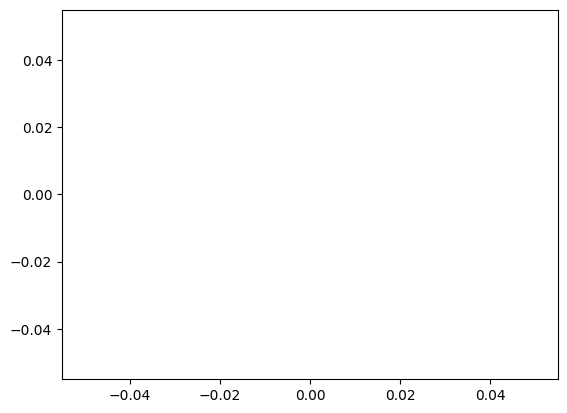

In [2]:
# 2_1_a neural network model
Layer1 = Dense(1,5)
Act1 = ReLU()
Layer2 = Dense(5,1)
Act2 = Linear()
Loss = Mean_Square_Error_loss()
Optimizer = SGD(0.001)


c= 0
y_predict = 0
for epoch in range(20):
    #forward
    
    Layer1.forward(x_train)
    Act1.forward(Layer1.output)
    Layer2.forward(Act1.output)
    Act2.forward(Layer2.output)
    loss = Loss.forward(Act2.output,y_train)
    
    # Report
    y_predict = np.argmax(Act2.output,axis = 1)
    accuracy = np.mean(y_train == y_predict)
    print("Epoch:",epoch,)
    print("Loss for training data:",loss)
    
    #backward
    Loss.backward(Act2.output,y_train)
    Act2.backward(Loss.b_output)
    Layer2.backward(Act2.b_output)
    Act1.backward(Layer2.b_output)
    Layer1.backward(Act1.b_output)
    
    #update params
    Optimizer.update(Layer1)
    Optimizer.update(Layer2)
    
    
    Layer1.forward(x_val)
    Act1.forward(Layer1.output)
    Layer2.forward(Act1.output)
    Act2.forward(Layer2.output)
    loss = Loss.forward(Act2.output,y_val)
    
    # Report
    y_predict = np.argmax(Act2.output,axis = 1)
    accuracy = np.mean(y_val == y_predict)
    print("Loss for validation data:",loss)
    print('--------------------------')
    
    #backward
    Loss.backward(Act2.output,y_val)
    Act2.backward(Loss.b_output)
    Layer2.backward(Act2.b_output)
    Act1.backward(Layer2.b_output)
    Layer1.backward(Act1.b_output)
    
    loss_valid = Loss.forward(Act2.output,y_val)
    loss_valid[0]=round(loss_valid[0],12)
    preLossValid=loss_valid

    if epoch==0: 
        pass
    else:
        if loss_valid[0] >= preLossValid[0] :
            
            if c<2:
                c+=1
            else:
                break 
        else:
            c=0
    
    #update params
    Optimizer.update(Layer1)
    Optimizer.update(Layer2)

#Testing Step:
p = x_test
Layer1.forward(p)
Act1.forward(Layer1.output)
Layer2.forward(Act1.output)
Act2.forward(Layer2.output)

a = Act2.output

plt.scatter(p,a, c='blue')

loss = Loss.forward(Act2.output,y_test)
print("Loss for testing dataset:", loss)

Epoch: 0
Loss for training data: [7.49847124-0.00055639j]
Loss for validation data: [6.19302803-0.00899821j]
--------------------------
Epoch: 1
Loss for training data: [6.20473203-0.07035186j]
Loss for validation data: [5.92800209-0.01962394j]
--------------------------
Epoch: 2
Loss for training data: [6.04313088-0.0869547j]
Loss for validation data: [5.83282514-0.01599289j]
--------------------------
Epoch: 3
Loss for training data: [5.95404549-0.08610639j]
Loss for validation data: [5.77187368-0.01407533j]
--------------------------
Loss for testing dataset: [6.70841784-0.00497917j]


C:\Users\Ansar9811291\AppData\Local\Temp\ipykernel_4508\1867785691.py:59: DeprecationWarning: The Python built-in `round` is deprecated for complex scalars, and will raise a `TypeError` in a future release. Use `np.round` or `scalar.round` instead.
  loss_valid[0]=round(loss_valid[0],12)


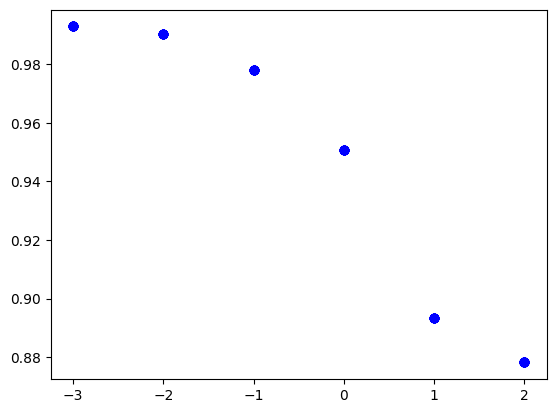

In [3]:
# 2_1_b neural network model
Layer1 = Dense(1,5)
Act1 = ReLU()
Layer2 = Dense(5,1)
Act2 = Sigmoid()
Loss = Mean_Square_Error_loss()
Optimizer = SGD(0.001)


c= 0
y_predict = 0
for epoch in range(20):
    #forward
    
    Layer1.forward(x_train)
    Act1.forward(Layer1.output)
    Layer2.forward(Act1.output)
    Act2.forward(Layer2.output)
    loss = Loss.forward(Act2.output,y_train)
    
    # Report
    y_predict = np.argmax(Act2.output,axis = 1)
    accuracy = np.mean(y_train == y_predict)
    print("Epoch:",epoch,)
    print("Loss for training data:",loss)
    
    #backward
    Loss.backward(Act2.output,y_train)
    Act2.backward(Loss.b_output)
    Layer2.backward(Act2.b_output)
    Act1.backward(Layer2.b_output)
    Layer1.backward(Act1.b_output)
    
    #update params
    Optimizer.update(Layer1)
    Optimizer.update(Layer2)
    
    
    Layer1.forward(x_val)
    Act1.forward(Layer1.output)
    Layer2.forward(Act1.output)
    Act2.forward(Layer2.output)
    loss = Loss.forward(Act2.output,y_val)
    
    # Report
    y_predict = np.argmax(Act2.output,axis = 1)
    accuracy = np.mean(y_val == y_predict)
    print("Loss for validation data:",loss)
    print('--------------------------')
    
    #backward
    Loss.backward(Act2.output,y_val)
    Act2.backward(Loss.b_output)
    Layer2.backward(Act2.b_output)
    Act1.backward(Layer2.b_output)
    Layer1.backward(Act1.b_output)
    
    loss_valid = Loss.forward(Act2.output,y_val)
    loss_valid[0]=round(loss_valid[0],12)
    preLossValid=loss_valid

    if epoch==0: 
        pass
    else:
        if loss_valid[0] >= preLossValid[0] :
            
            if c<2:
                c+=1
            else:
                break 
        else:
            c=0
    
    #update params
    Optimizer.update(Layer1)
    Optimizer.update(Layer2)

#Testing Step:
p = x_test
Layer1.forward(p)
Act1.forward(Layer1.output)
Layer2.forward(Act1.output)
Act2.forward(Layer2.output)

a = Act2.output

plt.scatter(p,a, c='blue')

loss = Loss.forward(Act2.output,y_test)
print("Loss for testing dataset:", loss)

Loss for test data is equal to loss is decreased. More epochs lead to less loss. And after updating params, loss for test data would be less.
Using early stopping lead us to have an expectation in loss decrease.

In [4]:
Layer1 = Dense(1,10)

Act1 = ReLU()

Layer2 = Dense(10,5)

Act2 =  ReLU()

Layer3 = Dense(5,1)

Act3 = Linear()

Loss = Mean_Square_Error_loss()

Optimizer = SGD(0.001)

In [5]:
c=0
for epoch in range(20):
    
    #forward
    Layer1.forward(x_train)
    Act1.forward(Layer1.output)
    Layer2.forward(Act1.output)
    Act2.forward(Layer2.output)
    Layer3.forward(Act2.output)
    Act3.forward(Layer3.output)
    loss_train = Loss.forward(Act3.output,y_train)

    #backward
    Loss.backward(Act3.output,y_train)
    Act3.backward(Loss.b_output)
    Layer3.backward(Act3.b_output)
    Act2.backward(Layer3.b_output)
    Layer2.backward(Act2.b_output)
    Act1.backward(Layer2.b_output)
    Layer1.backward(Act1.b_output)
    
    Layer1.forward(x_val)
    Act1.forward(Layer1.output)
    Layer2.forward(Act1.output)
    Act2.forward(Layer2.output)
    Layer3.forward(Act2.output)
    Act3.forward(Layer3.output)
    
    loss_valid = Loss.forward(Act2.output,y_val)
    
    for item in loss_valid:
        
        item=round(item,12)
    if epoch==0: 
        pass
    else:
        if loss_valid[0] >= preLossValid[0] :
            
            if c<5:
                c+=1
            else:
                break 
        else:
            c=0
    print('Train data')
    print(f'Epoch:{epoch}')
    print(f'Loss: {loss_train}')

    print('Validation data')
    print(f'Loss: {loss_valid}')
    print('----------------------------')

    Loss.backward(Act3.output,y_val)
    Act3.backward(Loss.b_output)
    Layer3.backward(Act3.b_output)
    Act2.backward(Layer3.b_output)
    Layer2.backward(Act2.b_output)
    Act1.backward(Layer2.b_output)
    Layer1.backward(Act1.b_output)
    
    preLossValid=loss_valid
    #update params

    Optimizer.update(Layer1)
    Optimizer.update(Layer2)
    Optimizer.update(Layer3)

Train data
Epoch:0
Loss: [47.9996137+0.74819205j]
Validation data
Loss: [10.81184155+3.43132961e-19j 10.81184155+3.43132961e-19j
 10.81221604-8.46926605e-02j 10.81184155+3.43132961e-19j
 10.81184155+3.43132961e-19j]
----------------------------
Train data
Epoch:1
Loss: [12.67181868-0.55157065j]
Validation data
Loss: [11.76736874-5.14647121e-02j 10.81184155+3.43132961e-19j
 10.81184155+3.43132961e-19j 10.81184155+3.43132961e-19j
 10.81184155+3.43132961e-19j]
----------------------------
Train data
Epoch:2
Loss: [7.41466772-0.0559653j]
Validation data
Loss: [10.81184155+3.43132961e-19j 10.81184155+3.43132961e-19j
 10.81184155+3.43132961e-19j 10.81184155+3.43132961e-19j
 10.81184155+3.43132961e-19j]
----------------------------
Train data
Epoch:3
Loss: [5.12893956-0.10067681j]
Validation data
Loss: [10.81184155+3.43132961e-19j 10.81184155+3.43132961e-19j
 10.81184155+3.43132961e-19j 10.81184155+3.43132961e-19j
 10.81184155+3.43132961e-19j]
----------------------------
Train data
Epoch:4
L

C:\Users\Ansar9811291\AppData\Local\Temp\ipykernel_4508\1790819274.py:33: DeprecationWarning: The Python built-in `round` is deprecated for complex scalars, and will raise a `TypeError` in a future release. Use `np.round` or `scalar.round` instead.
  item=round(item,12)


Loss for test data is equal to loss is decreased. More epochs lead to less loss. And after updating params, loss for test data would be less.
Using early stopping lead us to have an expectation in loss decrease.

Loss for testing dataset: [1.21795992-0.00831542j]


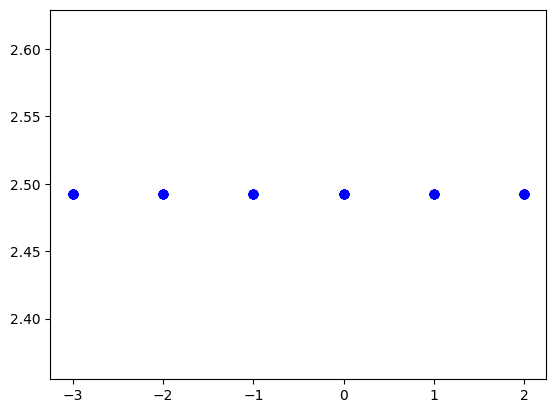

In [6]:
#Testing Step:
p = x_test
Layer1.forward(p)
Act1.forward(Layer1.output)
Layer2.forward(Act1.output)
Act2.forward(Layer2.output)

Layer3.forward(Act2.output)
Act3.forward(Layer3.output)

a = Act3.output

plt.scatter(p,a, c='blue')

loss = Loss.forward(Act3.output,y_test)
print("Loss for testing dataset:", loss)

In [7]:
#2_1_C
Layer1 = Dense(1,10)

Act1 = Sigmoid()

Layer2 = Dense(10,5)

Act2 = Sigmoid()

Layer3 = Dense(5,1)

Act3 = Linear()

Loss = Mean_Square_Error_loss()

Optimizer = SGD(0.001)

In [8]:
c=0
for epoch in range(20):
    
    #forward
    Layer1.forward(x_train)
    Act1.forward(Layer1.output)
    Layer2.forward(Act1.output)
    Act2.forward(Layer2.output)
    Layer3.forward(Act2.output)
    Act3.forward(Layer3.output)
    loss_train = Loss.forward(Act3.output,y_train)

    #backward
    Loss.backward(Act3.output,y_train)
    Act3.backward(Loss.b_output)
    Layer3.backward(Act3.b_output)
    Act2.backward(Layer3.b_output)
    Layer2.backward(Act2.b_output)
    Act1.backward(Layer2.b_output)
    Layer1.backward(Act1.b_output)
    
    Layer1.forward(x_val)
    Act1.forward(Layer1.output)
    Layer2.forward(Act1.output)
    Act2.forward(Layer2.output)
    Layer3.forward(Act2.output)
    Act3.forward(Layer3.output)
    
    loss_valid = Loss.forward(Act2.output,y_val)
    
    for item in loss_valid:
        
        item=round(item,12)
    if epoch==0: 
        pass
    else:
        if loss_valid[0] >= preLossValid[0] :
            
            if c<5:
                c+=1
            else:
                break 
        else:
            c=0
    print('Train data')
    print(f'Epoch:{epoch}')
    print(f'Loss: {loss_train}')

    print('Validation data')
    print(f'Loss: {loss_valid}')
    print('----------------------------')

    Loss.backward(Act3.output,y_val)
    Act3.backward(Loss.b_output)
    Layer3.backward(Act3.b_output)
    Act2.backward(Layer3.b_output)
    Layer2.backward(Act2.b_output)
    Act1.backward(Layer2.b_output)
    Layer1.backward(Act1.b_output)
    
    preLossValid=loss_valid
    #update params

    Optimizer.update(Layer1)
    Optimizer.update(Layer2)
    Optimizer.update(Layer3)

Train data
Epoch:0
Loss: [6.41344681-0.09036677j]
Validation data
Loss: [ 9.45672628-2.11300586e-04j 10.72607981-5.73307687e-05j
 10.77722571-9.46049408e-05j 10.53504134-9.80626602e-04j
 10.8035238 -9.89424268e-06j]
----------------------------
Train data
Epoch:1
Loss: [4.30308039-0.1336808j]
Validation data
Loss: [ 9.65356899-1.60767875e-04j 10.72731596-5.86492171e-05j
 10.7770562 -9.70108598e-05j 10.51825381-1.16216741e-03j
 10.80362361-9.75801383e-06j]
----------------------------
Train data
Epoch:2
Loss: [3.08240507-0.16566726j]
Validation data
Loss: [ 9.77508897-2.04503921e-04j 10.72791373-6.04776171e-05j
 10.77690186-9.93804370e-05j 10.503896  -1.35303969e-03j
 10.80368816-9.73399271e-06j]
----------------------------
Train data
Epoch:3
Loss: [2.35693988-0.18972091j]
Validation data
Loss: [ 9.85468184-2.80335151e-04j 10.7281585 -6.22120131e-05j
 10.77677441-1.01592596e-04j 10.49215769-1.54315482e-03j
 10.8037309 -9.76010473e-06j]
----------------------------
Train data
Epoch:4
Lo

C:\Users\Ansar9811291\AppData\Local\Temp\ipykernel_4508\1790819274.py:33: DeprecationWarning: The Python built-in `round` is deprecated for complex scalars, and will raise a `TypeError` in a future release. Use `np.round` or `scalar.round` instead.
  item=round(item,12)


Loss for testing dataset: [0.99281886-0.00663069j]


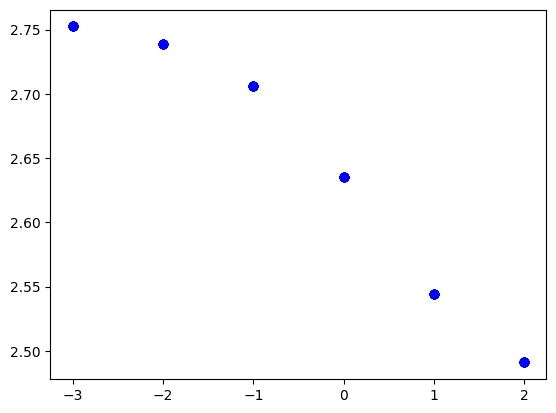

In [9]:
#Testing Step:
p = x_test
Layer1.forward(p)
Act1.forward(Layer1.output)
Layer2.forward(Act1.output)
Act2.forward(Layer2.output)

Layer3.forward(Act2.output)
Act3.forward(Layer3.output)

a = Act3.output

plt.scatter(p,a, c='blue')

loss = Loss.forward(Act3.output,y_test)
print("Loss for testing dataset:", loss)

Loss for test data is equal to loss is decreased. More epochs lead to less loss. And after updating params, loss for test data would be less.
Using early stopping lead us to have an expectation in loss decrease.

# 4-2

# a , dropout rate = 0.2

In [10]:
class Dense_d:

    def __init__(self,n_inputs,n_neurons,Pd):
        self.Pdropout=Pd
        self.w=np.random.randint(-2, 2, (n_inputs, n_neurons))
        self.b = np.random.randint(-2, 2, (1, n_neurons))    #b
        self.weight_history = 0
        self.bias_history = 0

    def forward(self,inputs,t):
        self.input = inputs  #p
        if t!='test':
            for i in range(len(self.w)):
                for j in range(len(self.w[i])):
                    p=np.random.uniform()
                    if p>=0 and p<self.Pdropout:
                        self.w[i][j]=0
        self.output = np.dot(inputs,self.w)+self.b

    def backward(self,b_input,t):
        if t!='test':
            for i in range(len(self.w)):
                for j in range(len(self.w[i])):
                    p=np.random.uniform()
                    if p>=0 and p<self.Pdropout:
                        self.w[i][j]=0
        
        self.b_output = np.dot(b_input,self.w.T)
        self.g_w = np.dot(self.input.T,b_input)
        self.g_b = np.sum(b_input,axis=0,keepdims=True)

Epoch: 0
Loss: [49.59340661+1.08072184j]
--------------------------
Epoch: 1
Loss: [679.23584793+14.89569077j]
--------------------------
Epoch: 2
Loss: [338.88623808+8.60310375j]
--------------------------
Epoch: 3
Loss: [14.69318808+0.096163j]
--------------------------
Epoch: 4
Loss: [1.72546609-0.24411463j]
--------------------------
Epoch: 5
Loss: [1.20675721-0.25772573j]
--------------------------
Epoch: 6
Loss: [1.18600885-0.25827018j]
--------------------------
Epoch: 7
Loss: [1.18517892-0.25829195j]
--------------------------
Epoch: 8
Loss: [1.18514572-0.25829283j]
--------------------------
Epoch: 9
Loss: [1.18514439-0.25829286j]
--------------------------
Epoch: 10
Loss: [1.18514434-0.25829286j]
--------------------------
Epoch: 11
Loss: [1.18514434-0.25829286j]
--------------------------
Epoch: 12
Loss: [1.18514434-0.25829286j]
--------------------------
Epoch: 13
Loss: [1.18514434-0.25829286j]
--------------------------
Epoch: 14
Loss: [1.18514434-0.25829286j]
------------

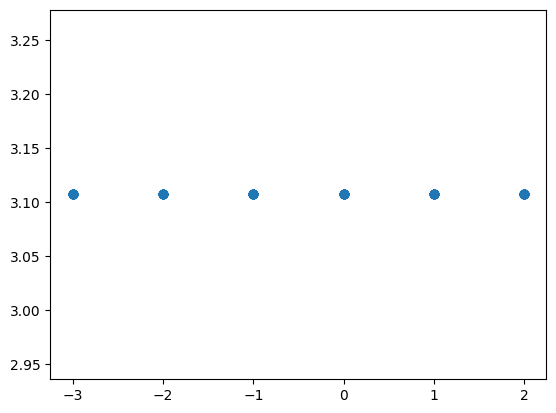

In [11]:

# 2_1_a neural network model
Layer1 = Dense_d(1,5,0.2)
Act1 = ReLU()
Layer2 = Dense(5,1)
Act2 = Linear()
Loss = Mean_Square_Error_loss()
Optimizer = SGD(0.001)



y_predict = 0
for epoch in range(20):
    #forward
    
    Layer1.forward(x_train,0.2)
    Act1.forward(Layer1.output)
    Layer2.forward(Act1.output)
    Act2.forward(Layer2.output)
    loss = Loss.forward(Act2.output,y_train)
    
    # Report
    y_predict = np.argmax(Act2.output,axis = 1)
    accuracy = np.mean(y_train == y_predict)
    print("Epoch:",epoch,)
    print("Loss:",loss)
    print('--------------------------')
    
    #backward
    Loss.backward(Act2.output,y_train)
    Act2.backward(Loss.b_output)
    Layer2.backward(Act2.b_output)
    Act1.backward(Layer2.b_output)
    Layer1.backward(Act1.b_output,0.2)
    
    #update params
    Optimizer.update(Layer1)
    Optimizer.update(Layer2)

#Testing Step:
p = x_test
Layer1.forward(p,0.2)
Act1.forward(Layer1.output)
Layer2.forward(Act1.output)
Act2.forward(Layer2.output)

a = Act2.output

plt.scatter(p,a)

loss = Loss.forward(Act2.output,y_test)
print("Loss for testing dataset:", loss)



Epoch: 0
Loss: [34.21928238+0.2591555j]
--------------------------
Epoch: 1
Loss: [33.12699669+0.35635629j]
--------------------------
Epoch: 2
Loss: [25.40277889+0.19934837j]
--------------------------
Epoch: 3
Loss: [8.32404076-0.28347847j]
--------------------------
Epoch: 4
Loss: [1.67541391-0.23511813j]
--------------------------
Epoch: 5
Loss: [1.32321317-0.27792137j]
--------------------------
Epoch: 6
Loss: [1.22344474-0.26690147j]
--------------------------
Epoch: 7
Loss: [1.07953357-0.23212041j]
--------------------------
Epoch: 8
Loss: [1.00481602-0.21876312j]
--------------------------
Epoch: 9
Loss: [0.9729133-0.21454533j]
--------------------------
Epoch: 10
Loss: [0.95984732-0.2111254j]
--------------------------
Epoch: 11
Loss: [0.94142022-0.20362534j]
--------------------------
Epoch: 12
Loss: [1.1759921-0.25286868j]
--------------------------
Epoch: 13
Loss: [1.15018011-0.24618912j]
--------------------------
Epoch: 14
Loss: [1.02165023-0.21356534j]
------------------

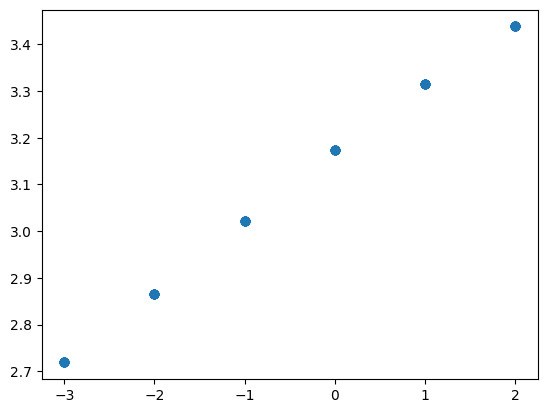

In [12]:

# 2_1_b neural network model
Layer1 = Dense_d(1,5,0.2)
Act1 = Sigmoid()
Layer2 = Dense(5,1)
Act2 = Linear()
Loss = Mean_Square_Error_loss()
Optimizer = SGD(0.001)



y_predict = 0
for epoch in range(20):
    #forward
    
    Layer1.forward(x_train,0.2)
    Act1.forward(Layer1.output)
    Layer2.forward(Act1.output)
    Act2.forward(Layer2.output)
    loss = Loss.forward(Act2.output,y_train)
    
    # Report
    y_predict = np.argmax(Act2.output,axis = 1)
    accuracy = np.mean(y_train == y_predict)
    print("Epoch:",epoch,)
    print("Loss:",loss)
    print('--------------------------')
    
    #backward
    Loss.backward(Act2.output,y_train)
    Act2.backward(Loss.b_output)
    Layer2.backward(Act2.b_output)
    Act1.backward(Layer2.b_output)
    Layer1.backward(Act1.b_output,0.2)
    
    #update params
    Optimizer.update(Layer1)
    Optimizer.update(Layer2)

#Testing Step:
p = x_test
Layer1.forward(p,0.2)
Act1.forward(Layer1.output)
Layer2.forward(Act1.output)
Act2.forward(Layer2.output)

a = Act2.output

plt.scatter(p,a)

loss = Loss.forward(Act2.output,y_test)
print("Loss for testing dataset:", loss)



Epoch 0 :
Loss [10.83689109+5.12440949e-18j]
--------------------------
Epoch 1 :
Loss [1.57121421-0.24796115j]
--------------------------
Epoch 2 :
Loss [2.57596436-0.26221449j]
--------------------------
Epoch 3 :
Loss [5.23011127-0.26230559j]
--------------------------
Epoch 4 :
Loss [5.80846426-0.26658689j]
--------------------------
Epoch 5 :
Loss [2.57502045-0.2592651j]
--------------------------
Epoch 6 :
Loss [1.24073938-0.25833175j]
--------------------------
Epoch 7 :
Loss [1.18736814-0.25829442j]
--------------------------
Epoch 8 :
Loss [1.18523329-0.25829292j]
--------------------------
Epoch 9 :
Loss [1.18514789-0.25829286j]
--------------------------
Epoch 10 :
Loss [1.18514448-0.25829286j]
--------------------------
Epoch 11 :
Loss [1.18514434-0.25829286j]
--------------------------
Epoch 12 :
Loss [1.18514434-0.25829286j]
--------------------------
Epoch 13 :
Loss [1.18514434-0.25829286j]
--------------------------
Epoch 14 :
Loss [1.18514434-0.25829286j]
-------------

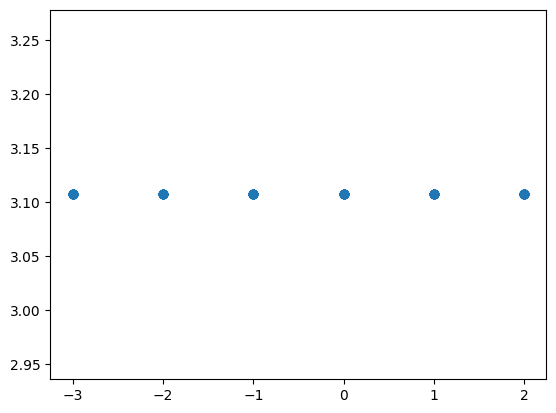

In [13]:
# 2_1_c neural network model

Layer1 = Dense_d(1,10,0.2)
Act1 = ReLU()

Layer2 = Dense_d(10,5,0.2)
Act2 = ReLU()

Layer3 = Dense(5,1)
Act3 = Linear()

Loss = Mean_Square_Error_loss()

Optimizer = SGD(0.001)



for epoch in range(20):
    #forward
    Layer1.forward(x_train,0.2)
    Act1.forward(Layer1.output)
    Layer2.forward(Act1.output,0.2)
    Act2.forward(Layer2.output)
    Layer3.forward(Act2.output)
    Act3.forward(Layer3.output)
    loss = Loss.forward(Act3.output,y_train)
    
    print("Epoch", epoch,":")
    print("Loss", loss)    
    print('--------------------------')
    
    #backward
    Loss.backward(Act3.output,y_train)
    Act3.backward(Loss.b_output)
    Layer3.backward(Act3.b_output)
    Act2.backward(Layer3.b_output)
    
    Layer2.backward(Act2.b_output,0.2)
    Act1.backward(Layer2.b_output)
    Layer1.backward(Act1.b_output,0.2)
    
    #update params
    Optimizer.update(Layer1)
    Optimizer.update(Layer2)
    Optimizer.update(Layer3)
    
#Testing Step:
p = x_test
Layer1.forward(p,0.2)
Act1.forward(Layer1.output)
Layer2.forward(Act1.output,0.2)
Act2.forward(Layer2.output)
Layer3.forward(Act2.output)
Act3.forward(Layer3.output)
a = Act3.output

plt.scatter(p,a)

loss = Loss.forward(Act3.output,y_test)
print("Loss for testing dataset:", loss)


Epoch 0 :
Loss [32.85180957+0.22814791j]
--------------------------
Epoch 1 :
Loss [1.53107218-0.24976905j]
--------------------------
Epoch 2 :
Loss [1.15381973-0.25123063j]
--------------------------
Epoch 3 :
Loss [1.06845172-0.24232507j]
--------------------------
Epoch 4 :
Loss [1.23293301-0.23425753j]
--------------------------
Epoch 5 :
Loss [1.27561905-0.25691465j]
--------------------------
Epoch 6 :
Loss [1.19357587-0.25690293j]
--------------------------
Epoch 7 :
Loss [1.18629438-0.25784221j]
--------------------------
Epoch 8 :
Loss [1.18647086-0.25782817j]
--------------------------
Epoch 9 :
Loss [1.18558688-0.25826848j]
--------------------------
Epoch 10 :
Loss [1.18575986-0.25805035j]
--------------------------
Epoch 11 :
Loss [1.18554697-0.25829907j]
--------------------------
Epoch 12 :
Loss [1.18534653-0.25827563j]
--------------------------
Epoch 13 :
Loss [1.1851529-0.25827222j]
--------------------------
Epoch 14 :
Loss [1.18520351-0.25829446j]
-----------------

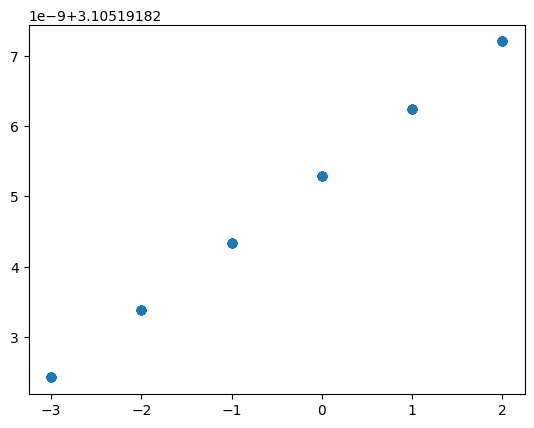

In [14]:
# 2_1_d neural network model

Layer1 = Dense_d(1,10,0.2)
Act1 = Sigmoid()

Layer2 = Dense_d(10,5,0.2)
Act2 = Sigmoid()

Layer3 = Dense(5,1)
Act3 = Linear()

Loss = Mean_Square_Error_loss()

Optimizer = SGD(0.001)

for epoch in range(20):
    #forward
    Layer1.forward(x_train,0.2)
    Act1.forward(Layer1.output)
    Layer2.forward(Act1.output,0.2)
    Act2.forward(Layer2.output)
    Layer3.forward(Act2.output)
    Act3.forward(Layer3.output)
    loss = Loss.forward(Act3.output,y_train)
    
    print("Epoch", epoch,":")
    print("Loss", loss)    
    print('--------------------------')
    
    #backward
    Loss.backward(Act3.output,y_train)
    Act3.backward(Loss.b_output)
    Layer3.backward(Act3.b_output)
    Act2.backward(Layer3.b_output)
    
    Layer2.backward(Act2.b_output,0.2)
    Act1.backward(Layer2.b_output)
    Layer1.backward(Act1.b_output,0.2)
    
    #update params
    Optimizer.update(Layer1)
    Optimizer.update(Layer2)
    Optimizer.update(Layer3)
    
#Testing Step:
p = x_test
Layer1.forward(p,0.2)
Act1.forward(Layer1.output)
Layer2.forward(Act1.output,0.2)
Act2.forward(Layer2.output)
Layer3.forward(Act2.output)
Act3.forward(Layer3.output)
a = Act3.output

plt.scatter(p,a)

loss = Loss.forward(Act3.output,y_test)
print("Loss for testing dataset:", loss)


# b dropout rate = 0.6

# a

Epoch: 0
Loss: [23.4864379+0.08313245j]
--------------------------
Epoch: 1
Loss: [474.17998916+74.39864196j]
--------------------------
Epoch: 2
Loss: [1.7681642e+08+91541688.32867962j]
--------------------------
Epoch: 3
Loss: [2.07489497e+24+1.50066343e+25j]
--------------------------
Epoch: 4
Loss: [4.68631601e+23+3.39005758e+24j]
--------------------------
Epoch: 5
Loss: [1.8745264e+22+1.35602303e+23j]
--------------------------
Epoch: 6
Loss: [7.49810562e+20+5.42409213e+21j]
--------------------------
Epoch: 7
Loss: [2.99924225e+19+2.16963685e+20j]
--------------------------
Epoch: 8
Loss: [1.1996969e+18+8.6785474e+18j]
--------------------------
Epoch: 9
Loss: [4.7987876e+16+3.47141896e+17j]
--------------------------
Epoch: 10
Loss: [1.91951504e+15+1.38856758e+16j]
--------------------------
Epoch: 11
Loss: [7.67806015e+13+5.55427034e+14j]
--------------------------
Epoch: 12
Loss: [3.07122406e+12+2.22170814e+13j]
--------------------------
Epoch: 13
Loss: [1.22848962e+11+8.886

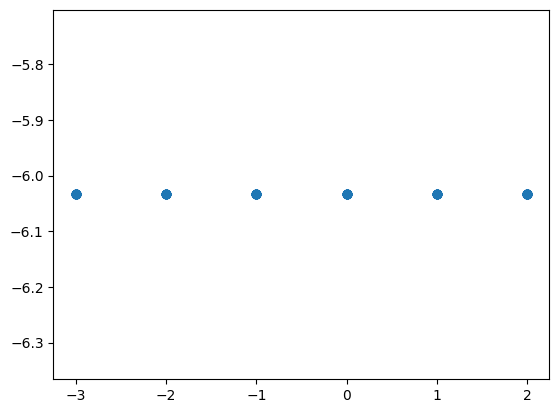

In [15]:

# 2_1_a neural network model
Layer1 = Dense_d(1,5,0.6)
Act1 = ReLU()
Layer2 = Dense(5,1)
Act2 = Linear()
Loss = Mean_Square_Error_loss()
Optimizer = SGD(0.001)



y_predict = 0
for epoch in range(20):
    #forward
    
    Layer1.forward(x_train,0.6)
    Act1.forward(Layer1.output)
    Layer2.forward(Act1.output)
    Act2.forward(Layer2.output)
    loss = Loss.forward(Act2.output,y_train)
    
    # Report
    y_predict = np.argmax(Act2.output,axis = 1)
    accuracy = np.mean(y_train == y_predict)
    print("Epoch:",epoch,)
    print("Loss:",loss)
    print('--------------------------')
    
    #backward
    Loss.backward(Act2.output,y_train)
    Act2.backward(Loss.b_output)
    Layer2.backward(Act2.b_output)
    Act1.backward(Layer2.b_output)
    Layer1.backward(Act1.b_output,0.6)
    
    #update params
    Optimizer.update(Layer1)
    Optimizer.update(Layer2)

#Testing Step:
p = x_test
Layer1.forward(p,0.6)
Act1.forward(Layer1.output)
Layer2.forward(Act1.output)
Act2.forward(Layer2.output)

a = Act2.output

plt.scatter(p,a)

loss = Loss.forward(Act2.output,y_test)
print("Loss for testing dataset:", loss)



Epoch: 0
Loss: [57.90296872+0.36779744j]
--------------------------
Epoch: 1
Loss: [60.32635411+0.19456499j]
--------------------------
Epoch: 2
Loss: [10.65632473-0.23087413j]
--------------------------
Epoch: 3
Loss: [2.48659139-0.28256723j]
--------------------------
Epoch: 4
Loss: [2.03791113-0.25387122j]
--------------------------
Epoch: 5
Loss: [1.72050105-0.23751612j]
--------------------------
Epoch: 6
Loss: [1.24785186-0.23739779j]
--------------------------
Epoch: 7
Loss: [1.17981389-0.25531885j]
--------------------------
Epoch: 8
Loss: [1.18521597-0.25826991j]
--------------------------
Epoch: 9
Loss: [1.17753417-0.25635887j]
--------------------------
Epoch: 10
Loss: [1.16579218-0.25249381j]
--------------------------
Epoch: 11
Loss: [1.17026121-0.25352265j]
--------------------------
Epoch: 12
Loss: [1.18317936-0.25774465j]
--------------------------
Epoch: 13
Loss: [1.17552725-0.2554392j]
--------------------------
Epoch: 14
Loss: [1.18514533-0.25829311j]
---------------

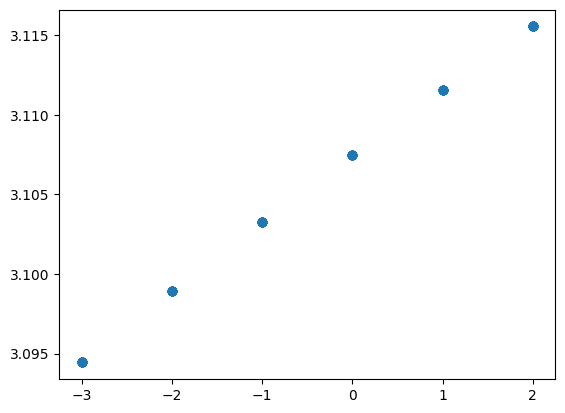

In [16]:

# 2_1_b neural network model
Layer1 = Dense_d(1,5,0.6)
Act1 = Sigmoid()
Layer2 = Dense(5,1)
Act2 = Linear()
Loss = Mean_Square_Error_loss()
Optimizer = SGD(0.001)



y_predict = 0
for epoch in range(20):
    #forward
    
    Layer1.forward(x_train,0.6)
    Act1.forward(Layer1.output)
    Layer2.forward(Act1.output)
    Act2.forward(Layer2.output)
    loss = Loss.forward(Act2.output,y_train)
    
    # Report
    y_predict = np.argmax(Act2.output,axis = 1)
    accuracy = np.mean(y_train == y_predict)
    print("Epoch:",epoch,)
    print("Loss:",loss)
    print('--------------------------')
    
    #backward
    Loss.backward(Act2.output,y_train)
    Act2.backward(Loss.b_output)
    Layer2.backward(Act2.b_output)
    Act1.backward(Layer2.b_output)
    Layer1.backward(Act1.b_output,0.6)
    
    #update params
    Optimizer.update(Layer1)
    Optimizer.update(Layer2)

#Testing Step:
p = x_test
Layer1.forward(p,0.6)
Act1.forward(Layer1.output)
Layer2.forward(Act1.output)
Act2.forward(Layer2.output)

a = Act2.output

plt.scatter(p,a)

loss = Loss.forward(Act2.output,y_test)
print("Loss for testing dataset:", loss)



Epoch 0 :
Loss [10.83689109+5.12440949e-18j]
--------------------------
Epoch 1 :
Loss [1.57121421-0.24796115j]
--------------------------
Epoch 2 :
Loss [1.20058713-0.25787959j]
--------------------------
Epoch 3 :
Loss [1.18576205-0.25827633j]
--------------------------
Epoch 4 :
Loss [1.18516904-0.2582922j]
--------------------------
Epoch 5 :
Loss [1.18514532-0.25829284j]
--------------------------
Epoch 6 :
Loss [1.18514437-0.25829286j]
--------------------------
Epoch 7 :
Loss [1.18514434-0.25829286j]
--------------------------
Epoch 8 :
Loss [1.18514434-0.25829286j]
--------------------------
Epoch 9 :
Loss [1.18514434-0.25829286j]
--------------------------
Epoch 10 :
Loss [1.18514434-0.25829286j]
--------------------------
Epoch 11 :
Loss [1.18514434-0.25829286j]
--------------------------
Epoch 12 :
Loss [1.18514434-0.25829286j]
--------------------------
Epoch 13 :
Loss [1.18514434-0.25829286j]
--------------------------
Epoch 14 :
Loss [1.18514434-0.25829286j]
-------------

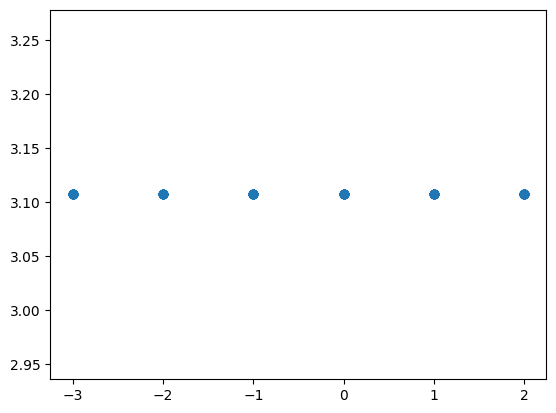

In [17]:
# 2_1_c neural network model

Layer1 = Dense_d(1,10,0.6)
Act1 = ReLU()

Layer2 = Dense_d(10,5,0.6)
Act2 = ReLU()

Layer3 = Dense(5,1)
Act3 = Linear()

Loss = Mean_Square_Error_loss()

Optimizer = SGD(0.001)



for epoch in range(20):
    #forward
    Layer1.forward(x_train,0.6)
    Act1.forward(Layer1.output)
    Layer2.forward(Act1.output,0.6)
    Act2.forward(Layer2.output)
    Layer3.forward(Act2.output)
    Act3.forward(Layer3.output)
    loss = Loss.forward(Act3.output,y_train)
    
    print("Epoch", epoch,":")
    print("Loss", loss)    
    print('--------------------------')
    
    #backward
    Loss.backward(Act3.output,y_train)
    Act3.backward(Loss.b_output)
    Layer3.backward(Act3.b_output)
    Act2.backward(Layer3.b_output)
    
    Layer2.backward(Act2.b_output,0.6)
    Act1.backward(Layer2.b_output)
    Layer1.backward(Act1.b_output,0.6)
    
    #update params
    Optimizer.update(Layer1)
    Optimizer.update(Layer2)
    Optimizer.update(Layer3)
    
#Testing Step:
p = x_test
Layer1.forward(p,0.6)
Act1.forward(Layer1.output)
Layer2.forward(Act1.output,0.6)
Act2.forward(Layer2.output)
Layer3.forward(Act2.output)
Act3.forward(Layer3.output)
a = Act3.output

plt.scatter(p,a)

loss = Loss.forward(Act3.output,y_test)
print("Loss for testing dataset:", loss)


Epoch 0 :
Loss [9.07338473-0.06809937j]
--------------------------
Epoch 1 :
Loss [1.22287868-0.25596956j]
--------------------------
Epoch 2 :
Loss [1.25571781-0.25858846j]
--------------------------
Epoch 3 :
Loss [1.19617721-0.25851235j]
--------------------------
Epoch 4 :
Loss [1.19503681-0.25837772j]
--------------------------
Epoch 5 :
Loss [1.18625521-0.25831763j]
--------------------------
Epoch 6 :
Loss [1.18628933-0.25831565j]
--------------------------
Epoch 7 :
Loss [1.18554299-0.25830402j]
--------------------------
Epoch 8 :
Loss [1.18537276-0.25829932j]
--------------------------
Epoch 9 :
Loss [1.18523313-0.2582957j]
--------------------------
Epoch 10 :
Loss [1.18518169-0.25829409j]
--------------------------
Epoch 11 :
Loss [1.18514945-0.25829307j]
--------------------------
Epoch 12 :
Loss [1.18514905-0.25829305j]
--------------------------
Epoch 13 :
Loss [1.1851451-0.25829289j]
--------------------------
Epoch 14 :
Loss [1.18514463-0.25829288j]
-------------------

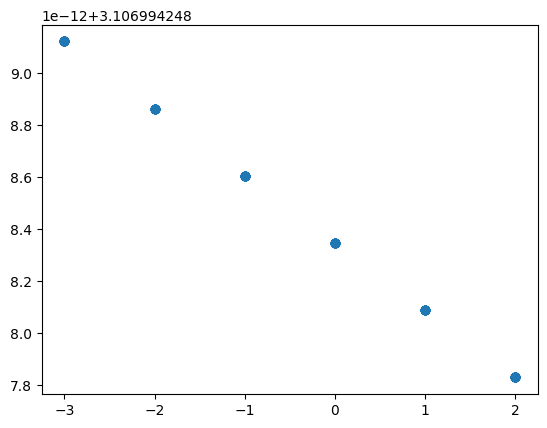

In [18]:
# 2_1_d neural network model

Layer1 = Dense_d(1,10,0.6)
Act1 = Sigmoid()

Layer2 = Dense_d(10,5,0.6)
Act2 = Sigmoid()

Layer3 = Dense(5,1)
Act3 = Linear()

Loss = Mean_Square_Error_loss()

Optimizer = SGD(0.001)

for epoch in range(20):
    #forward
    Layer1.forward(x_train,0.6)
    Act1.forward(Layer1.output)
    Layer2.forward(Act1.output,0.6)
    Act2.forward(Layer2.output)
    Layer3.forward(Act2.output)
    Act3.forward(Layer3.output)
    loss = Loss.forward(Act3.output,y_train)
    
    print("Epoch", epoch,":")
    print("Loss", loss)    
    print('--------------------------')
    
    #backward
    Loss.backward(Act3.output,y_train)
    Act3.backward(Loss.b_output)
    Layer3.backward(Act3.b_output)
    Act2.backward(Layer3.b_output)
    
    Layer2.backward(Act2.b_output,0.6)
    Act1.backward(Layer2.b_output)
    Layer1.backward(Act1.b_output,0.6)
    
    #update params
    Optimizer.update(Layer1)
    Optimizer.update(Layer2)
    Optimizer.update(Layer3)
    
#Testing Step:
p = x_test
Layer1.forward(p,0.6)
Act1.forward(Layer1.output)
Layer2.forward(Act1.output,0.6)
Act2.forward(Layer2.output)
Layer3.forward(Act2.output)
Act3.forward(Layer3.output)
a = Act3.output

plt.scatter(p,a)

loss = Loss.forward(Act3.output,y_test)
print("Loss for testing dataset:", loss)


# 4-3

# 4-4

In [19]:
class Softmax:

    def forward(self,inputs):
        neuron_output = np.exp(inputs-np.max(inputs,keepdims=True))
        self.output = neuron_output/np.sum(neuron_output,keepdims=True)
    
    def backward(self,b_input):
        self.b_output = b_input
        for i , (item1 , item2) in enumerate(zip(self.output,b_input)):
            item1 = item1.reshape(-1,1)
            #sd means softmax derivative
            sd = np.diagflat(item1)-np.dot(item1,item1.T)
            #if j=k: S_j-(S_j)^2
            #if j!=k: 0-(S_j)*(S_k)
            self.b_output[i] = np.dot(sd,item2)


In [20]:
datatrain=pd.read_csv("mnist_train.csv",delimiter=",", dtype=str)
datatest=pd.read_csv("mnist_test.csv",delimiter=",", dtype=str)


In [21]:
datatrain=np.array(datatrain)
datatest=np.array(datatrain)
datatest

array([['5', '0', '0', ..., '0', '0', '0'],
       ['0', '0', '0', ..., '0', '0', '0'],
       ['4', '0', '0', ..., '0', '0', '0'],
       ...,
       ['5', '0', '0', ..., '0', '0', '0'],
       ['6', '0', '0', ..., '0', '0', '0'],
       ['8', '0', '0', ..., '0', '0', '0']], dtype=object)

In [22]:
p = datatrain[0:55000].T[1:].T
t = datatrain[0:55000].T[0].reshape(-1,1)

pv = datatrain[0:5000].T[1:].T
tv = datatrain[0:5000].T[0].reshape(-1,1)

p_test = datatest[0:500].T[1:].T
t_test = datatest[0:500].T[0].reshape(-1,1)

x_train=p
y_train=t

x_valid=pv
y_valid=tv

x_test=p_test
y_test=t_test

In [23]:
y_train = y_train.astype(int)
x_test = x_test.astype(int)
y_test = y_test.astype(int)
x_train = x_train.astype(int)
x_valid =  x_valid.astype(int)
y_valid = y_valid.astype(int)

# a

In [24]:
class Categorical_cross_entroy_loss:
    def __init__(self):
        pass
    def forward(self,softmax_output,class_label):
        softmax_output = np.clip(softmax_output,0.000001,0.999999)
        cc = np.sum(softmax_output*class_label,axis=1)
        return np.sum(-np.log(cc)).reshape(-1)

    
    def backward(self,softmax_output,class_label):
        softmax_output = np.clip(softmax_output,0.000001,0.999999)
        self.b_output = -class_label/softmax_output


In [25]:
class SGD:
    def __init__(self,learning_rate = 0.001,momentum=0):
        self.learning_rate = learning_rate
        self.momentum = momentum
    def update(self,layer):
        if self.momentum:
            weight_update = self.momentum*layer.weight_history\
            + (1-self.momentum)*(-self.learning_rate*layer.g_w)
            layer.weight_update = weight_update
            bias_update = self.momentum*layer.weight_history\
            + (1-self.momentum)*(-self.learning_rate*layer.g_b)
            layer.bias_update = bias_update
        else:
            weight_update = - self.learning_rate*layer.g_w
            bias_update = - self.learning_rate*layer.g_b
        layer.w = layer.w + weight_update
        layer.b = layer.b + bias_update

In [26]:
Layer1 = Dense(784,10)
Act1 = Softmax()
Loss = Categorical_cross_entroy_loss()
Optimizer = SGD(0.0005)

In [27]:
c=0
for epoch in range(100):
    
    #forward
    Layer1.forward(x_train)
    Act1.forward(Layer1.output)
    loss_train = Loss.forward(Act1.output,y_train)
    
    
    # Report
    y_predict_train = np.argmax(Act1.output,axis = 1)
    accuracy_train = np.mean(y_train == y_predict_train)
    
    #backward
    Loss.backward(Act1.output,y_train)
    Act1.backward(Loss.b_output)
    Layer1.backward(Act1.b_output)
    
    
        
    if epoch==0: 
        pass
    else:
        if accuracy_valid >= pre_acc_valid: 
            if c<2:
                c+=1
            else:
                break 
        else:
            c=0
        
    
    Layer1.forward(x_valid)
    Act1.forward(Layer1.output)
    loss_valid = Loss.forward(Act1.output,y_valid)
    # Report
    y_predict_valid = np.argmax(Act1.output,axis = 1)
    accuracy_valid = np.mean(y_valid == y_predict_valid)
    #for i in range(len(accuracy_valid)):
        #accuracy_valid[i]=round(accuracy_valid[i],12)
    
    print('Train data: ')
    print(f'Epoch:{epoch}')
    print(f'Loss: {loss_train}')
    print(f'Accuracy: {accuracy_train}')
    
    print('Validation data: ')
    print(f'Epoch:{epoch}')
    print(f'Loss: {loss_valid}')
    print(f'Accuracy: {accuracy_valid}')
    print('--------------------------')

    #backward
    Loss.backward(Act1.output,y_valid)
    Act1.backward(Loss.b_output)
    Layer1.backward(Act1.b_output)
    pre_acc_valid=accuracy_valid
    pre_loss=loss_valid
    #update params
    Optimizer.update(Layer1)


C:\Users\Ansar9811291\AppData\Local\Temp\ipykernel_4508\1580103707.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(-np.log(cc)).reshape(-1)


Train data: 
Epoch:0
Loss: [inf]
Accuracy: 0.09879984429752066
Validation data: 
Epoch:0
Loss: [inf]
Accuracy: 0.09581032
--------------------------
Train data: 
Epoch:1
Loss: [inf]
Accuracy: 0.09879984429752066
Validation data: 
Epoch:1
Loss: [inf]
Accuracy: 0.09581032
--------------------------
Train data: 
Epoch:2
Loss: [inf]
Accuracy: 0.09879984429752066
Validation data: 
Epoch:2
Loss: [inf]
Accuracy: 0.09581032
--------------------------


In [28]:
for epoch in range(100):
    #forward
    Layer1.forward(x_test)
    Act1.forward(Layer1.output)
    loss_test = Loss.forward(Act1.output,y_test)
    
    
    # Report
    y_predict_test = np.argmax(Act1.output,axis = 1)
    accuracy_test = np.mean(y_test == y_predict_test)
    print(f'Epoch:{epoch}')
    print(f'Loss: {loss_test}')
    print(f'Accuracy: {accuracy_test}')
    print('--------------------------')
    #backward
    Loss.backward(Act1.output,y_test)
    Act1.backward(Loss.b_output)
    Layer1.backward(Act1.b_output)
    
    Optimizer.update(Layer1)


C:\Users\Ansar9811291\AppData\Local\Temp\ipykernel_4508\1580103707.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(-np.log(cc)).reshape(-1)


Epoch:0
Loss: [inf]
Accuracy: 0.100264
--------------------------
Epoch:1
Loss: [inf]
Accuracy: 0.100264
--------------------------
Epoch:2
Loss: [inf]
Accuracy: 0.100264
--------------------------
Epoch:3
Loss: [inf]
Accuracy: 0.100264
--------------------------
Epoch:4
Loss: [inf]
Accuracy: 0.100264
--------------------------
Epoch:5
Loss: [inf]
Accuracy: 0.100264
--------------------------
Epoch:6
Loss: [inf]
Accuracy: 0.100264
--------------------------
Epoch:7
Loss: [inf]
Accuracy: 0.100264
--------------------------
Epoch:8
Loss: [inf]
Accuracy: 0.100264
--------------------------
Epoch:9
Loss: [inf]
Accuracy: 0.100264
--------------------------
Epoch:10
Loss: [inf]
Accuracy: 0.100264
--------------------------
Epoch:11
Loss: [inf]
Accuracy: 0.100264
--------------------------
Epoch:12
Loss: [inf]
Accuracy: 0.100264
--------------------------
Epoch:13
Loss: [inf]
Accuracy: 0.100264
--------------------------
Epoch:14
Loss: [inf]
Accuracy: 0.100264
--------------------------
Epoch

In [29]:
#b

In [30]:
Layer1 = Dense(784,30)
Act1=ReLU()
Layer2 = Dense(30,10)

Act2= Softmax()
Loss = Categorical_cross_entroy_loss()
Optimizer = SGD(0.1)

In [31]:
c=0
for epoch in range(100):
    #forward
    Layer1.forward(x_train)
    Act1.forward(Layer1.output)
    Layer2.forward(Act1.output)
    Act2.forward(Layer2.output)
    loss_train = Loss.forward(Act2.output,y_train)
    
    y_predict_train = np.argmax(Act1.output,axis = 1)
    accuracy_train = np.mean(y_train == y_predict_train)
    
    #backward
    Loss.backward(Act2.output,y_train)
    Act2.backward(Loss.b_output)
    Layer2.backward(Act2.b_output)
    Act1.backward(Layer2.b_output)
    Layer1.backward(Act1.b_output)
    

        
    
    Layer1.forward(x_valid)
    Act1.forward(Layer1.output)
    Layer2.forward(Act1.output)
    Act2.forward(Layer2.output)
    loss_valid = Loss.forward(Act2.output,y_valid)
    
    y_predict_valid = np.argmax(Act1.output,axis = 1)
    accuracy_valid = np.mean(y_valid == y_predict_valid)
    
    
    
    #for i in range(len(accuracy_valid)):
       # accuracy_valid[i]=round(accuracy_valid[i],12)
        
    if epoch==0: 
        pass
    else:
        if accuracy_valid <= pre_acc_valid : 
            if c<2:
                c+=1
            else:
                break 
        else:
            c=0
    print('Train data: ')
    print(f'Epoch:{epoch}')
    print(f'Loss: {loss_train}')
    print(f'Accuracy: {accuracy_train}')
    
    print('Test data: ')
    print(f'Epoch:{epoch}')
    print(f'Loss: {loss_valid}')
    print(f'Accuracy: {accuracy_valid}')
    print('--------------------------')

    #backward
    Loss.backward(Act2.output,y_valid)
    Act2.backward(Loss.b_output)
    Layer2.backward(Act2.b_output)
    Act1.backward(Layer2.b_output)
    Layer1.backward(Act1.b_output)
    pre_acc_valid=accuracy_valid
    pre_loss=loss_valid
    #update params
    Optimizer.update(Layer1)
    Optimizer.update(Layer2)


C:\Users\Ansar9811291\AppData\Local\Temp\ipykernel_4508\1580103707.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(-np.log(cc)).reshape(-1)


Train data: 
Epoch:0
Loss: [inf]
Accuracy: 0.09874610909090908
Test data: 
Epoch:0
Loss: [inf]
Accuracy: 0.09574252
--------------------------
Train data: 
Epoch:1
Loss: [inf]
Accuracy: 0.09874610909090908
Test data: 
Epoch:1
Loss: [inf]
Accuracy: 0.09574252
--------------------------
Train data: 
Epoch:2
Loss: [inf]
Accuracy: 0.09874610909090908
Test data: 
Epoch:2
Loss: [inf]
Accuracy: 0.09574252
--------------------------


In [32]:
for epoch in range(100):

    #forward
    Layer1.forward(x_test)
    Act1.forward(Layer1.output)
    Layer2.forward(Act1.output)
    Act2.forward(Layer2.output)
    loss = Loss.forward(Act2.output,y_test)
    # Report
    y_predict = np.argmax(Act2.output,axis = 1)
    accuracy = np.mean(y_test == y_predict)
    print(f'Epoch:{epoch}')
    print(f'Loss: {loss}')
    print(f'Accuracy: {accuracy}')
    print('--------------------------')
    Optimizer.update(Layer1)
    Optimizer.update(Layer2)

C:\Users\Ansar9811291\AppData\Local\Temp\ipykernel_4508\1580103707.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(-np.log(cc)).reshape(-1)


Epoch:0
Loss: [inf]
Accuracy: 0.078052
--------------------------
Epoch:1
Loss: [inf]
Accuracy: 0.078052
--------------------------
Epoch:2
Loss: [inf]
Accuracy: 0.078052
--------------------------
Epoch:3
Loss: [inf]
Accuracy: 0.078052
--------------------------
Epoch:4
Loss: [inf]
Accuracy: 0.078052
--------------------------
Epoch:5
Loss: [inf]
Accuracy: 0.078052
--------------------------
Epoch:6
Loss: [inf]
Accuracy: 0.078052
--------------------------
Epoch:7
Loss: [inf]
Accuracy: 0.078052
--------------------------
Epoch:8
Loss: [inf]
Accuracy: 0.078052
--------------------------
Epoch:9
Loss: [inf]
Accuracy: 0.078052
--------------------------
Epoch:10
Loss: [inf]
Accuracy: 0.078052
--------------------------
Epoch:11
Loss: [inf]
Accuracy: 0.078052
--------------------------
Epoch:12
Loss: [inf]
Accuracy: 0.078052
--------------------------
Epoch:13
Loss: [inf]
Accuracy: 0.078052
--------------------------
Epoch:14
Loss: [inf]
Accuracy: 0.078052
--------------------------
Epoch

In [33]:
#c

In [34]:
Layer1 = Dense(784,30)
Act1=ReLU()
Layer2 = Dense(30,10)
Act2= Softmax()

Layer3 = Dense(10,10)
Act3= Softmax()

Loss = Categorical_cross_entroy_loss()
Optimizer = SGD(0.005)

In [35]:
c=0
for epoch in range(100):
    #forward
    Layer1.forward(x_train)
    Act1.forward(Layer1.output)
    Layer2.forward(Act1.output)
    Act2.forward(Layer2.output)
    
    Layer3.forward(Act2.output)
    Act3.forward(Layer3.output)
    loss_train = Loss.forward(Act3.output,y_train)
    
    
    # Report
    y_predict_train = np.argmax(Act2.output,axis = 1)
    accuracy_train = np.mean(y_train == y_predict_train)
   
    
    #backward
    Loss.backward(Act3.output,y_train)
    Act3.backward(Loss.b_output)
    Layer3.backward(Act3.b_output)
    
    Act2.backward(Layer3.b_output)
    Layer2.backward(Act2.b_output)
    
    Act1.backward(Layer2.b_output)
    Layer1.backward(Act1.b_output)
    
    
    # validation
    
    
    Layer1.forward(x_valid)
    Act1.forward(Layer1.output)
    Layer2.forward(Act1.output)
    Act2.forward(Layer2.output)
    
    Layer3.forward(Act2.output)
    Act3.forward(Layer3.output)
    loss_valid = Loss.forward(Act3.output,y_valid)
    
    
    # Report
    y_predict_valid = np.argmax(Act2.output,axis = 1)
    accuracy_valid = np.mean(y_valid == y_predict_valid)
    
    print('Train Data')
    print(f'Epoch:{epoch}')
    print(f'Loss: {loss_train}')
    print(f'Accuracy: {accuracy_train}')
    print('Validation Data')
    print(f'Epoch:{epoch}')
    print(f'Loss: {loss_valid}')
    print(f'Accuracy: {accuracy_valid}')
    print('--------------------------')
    
    
    
    #for i in range(len(accuracy_valid)):
        #accuracy_valid[i]=round(accuracy_valid[i],12)
        
    if epoch==0: 
        pass
    else:
        if accuracy_valid <= pre_acc_valid : 
            if c<2:
                c+=1
            else:
                break 
        else:
            c=0
            
    #backward
    Loss.backward(Act3.output,y_valid)
    Act3.backward(Loss.b_output)
    Layer3.backward(Act3.b_output)
    
    Act2.backward(Layer3.b_output)
    Layer2.backward(Act2.b_output)
    
    Act1.backward(Layer2.b_output)
    Layer1.backward(Act1.b_output)
    
    pre_acc_valid=accuracy_valid
    pre_loss=loss_valid
    #update params
    Optimizer.update(Layer1)
    Optimizer.update(Layer2)
    Optimizer.update(Layer3)

C:\Users\Ansar9811291\AppData\Local\Temp\ipykernel_4508\1580103707.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(-np.log(cc)).reshape(-1)


Train Data
Epoch:0
Loss: [inf]
Accuracy: 0.0987999788429752
Validation Data
Epoch:0
Loss: [inf]
Accuracy: 0.10999296
--------------------------
Train Data
Epoch:1
Loss: [inf]
Accuracy: 0.09880004099173553
Validation Data
Epoch:1
Loss: [inf]
Accuracy: 0.09580072
--------------------------
Train Data
Epoch:2
Loss: [inf]
Accuracy: 0.09880004099173553
Validation Data
Epoch:2
Loss: [inf]
Accuracy: 0.09580072
--------------------------
Train Data
Epoch:3
Loss: [inf]
Accuracy: 0.09880004099173553
Validation Data
Epoch:3
Loss: [inf]
Accuracy: 0.09580072
--------------------------


In [36]:
for epoch in range(100):
    #forward
    Layer1.forward(x_test)
    Act1.forward(Layer1.output)
    Layer2.forward(Act1.output)
    Act2.forward(Layer2.output)
    
    Layer3.forward(Act2.output)
    Act3.forward(Layer3.output)
    loss = Loss.forward(Act3.output,y_test)
    
    
    # Report
    y_predict = np.argmax(Act2.output,axis = 1)
    accuracy = np.mean(y_test == y_predict)
    print(f'Epoch:{epoch}')
    print(f'Loss: {loss}')
    print(f'Accuracy: {accuracy}')
    print('--------------------------')
    
    
    
    #update params
    Optimizer.update(Layer1)
    Optimizer.update(Layer2)
    Optimizer.update(Layer3)

Epoch:0
Loss: [inf]
Accuracy: 0.104
--------------------------
Epoch:1
Loss: [inf]
Accuracy: 0.100024
--------------------------
Epoch:2
Loss: [inf]
Accuracy: 0.100008
--------------------------
Epoch:3
Loss: [inf]
Accuracy: 0.100016
--------------------------
Epoch:4
Loss: [inf]
Accuracy: 0.100008
--------------------------
Epoch:5
Loss: [inf]
Accuracy: 0.100008
--------------------------
Epoch:6
Loss: [inf]
Accuracy: 0.100008
--------------------------
Epoch:7
Loss: [inf]
Accuracy: 0.100008
--------------------------
Epoch:8
Loss: [inf]
Accuracy: 0.100008
--------------------------
Epoch:9
Loss: [inf]
Accuracy: 0.100008
--------------------------
Epoch:10
Loss: [inf]
Accuracy: 0.100008
--------------------------
Epoch:11
Loss: [inf]
Accuracy: 0.100008
--------------------------
Epoch:12
Loss: [inf]
Accuracy: 0.100008
--------------------------
Epoch:13
Loss: [inf]
Accuracy: 0.100008
--------------------------
Epoch:14
Loss: [inf]
Accuracy: 0.100008
--------------------------
Epoch:15

C:\Users\Ansar9811291\AppData\Local\Temp\ipykernel_4508\1580103707.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(-np.log(cc)).reshape(-1)


Epoch:36
Loss: [inf]
Accuracy: 0.100008
--------------------------
Epoch:37
Loss: [inf]
Accuracy: 0.100008
--------------------------
Epoch:38
Loss: [inf]
Accuracy: 0.100008
--------------------------
Epoch:39
Loss: [inf]
Accuracy: 0.100008
--------------------------
Epoch:40
Loss: [inf]
Accuracy: 0.100008
--------------------------
Epoch:41
Loss: [inf]
Accuracy: 0.100008
--------------------------
Epoch:42
Loss: [inf]
Accuracy: 0.100008
--------------------------
Epoch:43
Loss: [inf]
Accuracy: 0.100008
--------------------------
Epoch:44
Loss: [inf]
Accuracy: 0.100008
--------------------------
Epoch:45
Loss: [inf]
Accuracy: 0.100008
--------------------------
Epoch:46
Loss: [inf]
Accuracy: 0.100008
--------------------------
Epoch:47
Loss: [inf]
Accuracy: 0.100008
--------------------------
Epoch:48
Loss: [inf]
Accuracy: 0.100008
--------------------------
Epoch:49
Loss: [inf]
Accuracy: 0.100008
--------------------------
Epoch:50
Loss: [inf]
Accuracy: 0.100008
----------------------

# 4-5

In [37]:
p = datatrain[0:500].T[1:].T
t = datatrain[0:500].T[0].reshape(-1,1)
p_test = datatest[0:500].T[1:].T
t_test = datatest[0:500].T[0].reshape(-1,1)
x_train=p
y_train=t
x_test=p_test
y_test=t_test

In [38]:
y_train = y_train.astype(int)
x_test = x_test.astype(int)
y_test = y_test.astype(int)
x_train = x_train.astype(int)


In [39]:
Layer1 = Dense(784,10)
Act1 = Softmax()
Loss = Categorical_cross_entroy_loss()
Optimizer = SGD(0.0005)

In [40]:
for epoch in range(100):
    #forward
    Layer1.forward(x_train)
    Act1.forward(Layer1.output)
    loss = Loss.forward(Act1.output,y_train)
    
    
    # Report
    y_predict = np.argmax(Act1.output,axis = 1)
    accuracy = np.mean(y_train == y_predict)
    print(f'Epoch:{epoch}')
    print(f'Loss: {loss}')
    print(f'Accuracy: {accuracy}')
    print('--------------------------')
    
    #backward
    Loss.backward(Act1.output,y_train)
    Act1.backward(Loss.b_output)
    Layer1.backward(Act1.b_output)
    
    #update params
    Optimizer.update(Layer1)


C:\Users\Ansar9811291\AppData\Local\Temp\ipykernel_4508\1580103707.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(-np.log(cc)).reshape(-1)


Epoch:0
Loss: [inf]
Accuracy: 0.1
--------------------------
Epoch:1
Loss: [inf]
Accuracy: 0.1
--------------------------
Epoch:2
Loss: [inf]
Accuracy: 0.1
--------------------------
Epoch:3
Loss: [inf]
Accuracy: 0.1
--------------------------
Epoch:4
Loss: [inf]
Accuracy: 0.1
--------------------------
Epoch:5
Loss: [inf]
Accuracy: 0.1
--------------------------
Epoch:6
Loss: [inf]
Accuracy: 0.1
--------------------------
Epoch:7
Loss: [inf]
Accuracy: 0.1
--------------------------
Epoch:8
Loss: [inf]
Accuracy: 0.1
--------------------------
Epoch:9
Loss: [inf]
Accuracy: 0.1
--------------------------
Epoch:10
Loss: [inf]
Accuracy: 0.1
--------------------------
Epoch:11
Loss: [inf]
Accuracy: 0.1
--------------------------
Epoch:12
Loss: [inf]
Accuracy: 0.1
--------------------------
Epoch:13
Loss: [inf]
Accuracy: 0.1
--------------------------
Epoch:14
Loss: [inf]
Accuracy: 0.1
--------------------------
Epoch:15
Loss: [inf]
Accuracy: 0.1
--------------------------
Epoch:16
Loss: [in

In [41]:
for epoch in range(100):
    #forward
    Layer1.forward(x_test)
    Act1.forward(Layer1.output)
    loss = Loss.forward(Act1.output,y_test)
    
    
    # Report
    y_predict = np.argmax(Act1.output,axis = 1)
    accuracy = np.mean(y_test == y_predict)
    print(f'Epoch:{epoch}')
    print(f'Loss: {loss}')
    print(f'Accuracy: {accuracy}')
    print('--------------------------')
    
    
    #update params
    Optimizer.update(Layer1)


C:\Users\Ansar9811291\AppData\Local\Temp\ipykernel_4508\1580103707.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(-np.log(cc)).reshape(-1)


Epoch:0
Loss: [inf]
Accuracy: 0.1
--------------------------
Epoch:1
Loss: [inf]
Accuracy: 0.1
--------------------------
Epoch:2
Loss: [inf]
Accuracy: 0.1
--------------------------
Epoch:3
Loss: [inf]
Accuracy: 0.1
--------------------------
Epoch:4
Loss: [inf]
Accuracy: 0.1
--------------------------
Epoch:5
Loss: [inf]
Accuracy: 0.1
--------------------------
Epoch:6
Loss: [inf]
Accuracy: 0.1
--------------------------
Epoch:7
Loss: [inf]
Accuracy: 0.1
--------------------------
Epoch:8
Loss: [inf]
Accuracy: 0.1
--------------------------
Epoch:9
Loss: [inf]
Accuracy: 0.1
--------------------------
Epoch:10
Loss: [inf]
Accuracy: 0.1
--------------------------
Epoch:11
Loss: [inf]
Accuracy: 0.1
--------------------------
Epoch:12
Loss: [inf]
Accuracy: 0.1
--------------------------
Epoch:13
Loss: [inf]
Accuracy: 0.1
--------------------------
Epoch:14
Loss: [inf]
Accuracy: 0.1
--------------------------
Epoch:15
Loss: [inf]
Accuracy: 0.1
--------------------------
Epoch:16
Loss: [in

In [42]:
Layer1 = Dense_d(784,30,0.2)
Act1=ReLU()
Layer2 = Dense(30,10)

Act2= Softmax()
Loss = Categorical_cross_entroy_loss()
Optimizer = SGD(0.1)

In [43]:


for epoch in range(100):
    #forward
    Layer1.forward(x_train,'train')
    Act1.forward(Layer1.output)
    Layer2.forward(Act1.output)
    Act2.forward(Layer2.output)
    loss = Loss.forward(Act2.output,y_train)
    
    
    # Report
    y_predict = np.argmax(Act2.output,axis = 1)
    accuracy = np.mean(y_train == y_predict)
    print(f'Epoch:{epoch}')
    print(f'Loss: {loss}')
    print(f'Accuracy: {accuracy}')
    print('--------------------------')
    
    #backward
    Loss.backward(Act2.output,y_train)
    Act2.backward(Loss.b_output)
    Layer2.backward(Act2.b_output)
    Act1.backward(Layer2.b_output)
    Layer1.backward(Act1.b_output,'train')
    
    #update params
    Optimizer.update(Layer1)
    Optimizer.update(Layer2)

C:\Users\Ansar9811291\AppData\Local\Temp\ipykernel_4508\1580103707.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(-np.log(cc)).reshape(-1)


Epoch:0
Loss: [inf]
Accuracy: 0.099876
--------------------------
Epoch:1
Loss: [inf]
Accuracy: 0.09992
--------------------------
Epoch:2
Loss: [inf]
Accuracy: 0.10002
--------------------------
Epoch:3
Loss: [inf]
Accuracy: 0.100028
--------------------------
Epoch:4
Loss: [inf]
Accuracy: 0.09992
--------------------------
Epoch:5
Loss: [inf]
Accuracy: 0.10006
--------------------------
Epoch:6
Loss: [inf]
Accuracy: 0.100128
--------------------------
Epoch:7
Loss: [inf]
Accuracy: 0.100868
--------------------------
Epoch:8
Loss: [inf]
Accuracy: 0.099852
--------------------------
Epoch:9
Loss: [inf]
Accuracy: 0.099776
--------------------------
Epoch:10
Loss: [inf]
Accuracy: 0.099928
--------------------------
Epoch:11
Loss: [inf]
Accuracy: 0.10148
--------------------------
Epoch:12
Loss: [inf]
Accuracy: 0.09942
--------------------------
Epoch:13
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:14
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:15
Lo

In [44]:
for epoch in range(100):
    #forward
    Layer1.forward(x_test,'test')
    Act1.forward(Layer1.output)
    Layer2.forward(Act1.output)
    Act2.forward(Layer2.output)
    loss = Loss.forward(Act2.output,y_test)
    
    
    # Report
    y_predict = np.argmax(Act2.output,axis = 1)
    accuracy = np.mean(y_test == y_predict)
    print(f'Epoch:{epoch}')
    print(f'Loss: {loss}')
    print(f'Accuracy: {accuracy}')
    print('--------------------------')

    
    #update params
    Optimizer.update(Layer1)
    Optimizer.update(Layer2)

Epoch:0
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:1
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:2
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:3
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:4
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:5
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:6
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:7
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:8
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:9
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:10
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:11
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:12
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:13
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:14
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch

C:\Users\Ansar9811291\AppData\Local\Temp\ipykernel_4508\1580103707.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(-np.log(cc)).reshape(-1)


Epoch:21
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:22
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:23
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:24
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:25
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:26
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:27
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:28
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:29
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:30
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:31
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:32
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:33
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:34
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:35
Loss: [inf]
Accuracy: 0.099956
----------------------

In [45]:
Layer1 = Dense_d(784,30,0.2)
Act1=ReLU()
Layer2 = Dense_d(30,10,0.2)
Act2= Softmax()

Layer3 = Dense(10,10)
Act3= Softmax()

Loss = Categorical_cross_entroy_loss()
Optimizer = SGD(0.005)

In [46]:
for epoch in range(100):
    #forward
    Layer1.forward(x_train,'train')
    Act1.forward(Layer1.output)
    Layer2.forward(Act1.output,'train')
    Act2.forward(Layer2.output)
    
    Layer3.forward(Act2.output)
    Act3.forward(Layer3.output)
    loss = Loss.forward(Act3.output,y_train)
    
    
    # Report
    y_predict = np.argmax(Act2.output,axis = 1)
    accuracy = np.mean(y_train == y_predict)
    print(f'Epoch:{epoch}')
    print(f'Loss: {loss}')
    print(f'Accuracy: {accuracy}')
    print('--------------------------')
    
    #backward
    Loss.backward(Act3.output,y_train)
    Act3.backward(Loss.b_output)
    Layer3.backward(Act3.b_output)
    
    Act2.backward(Layer3.b_output)
    Layer2.backward(Act2.b_output,'train')
    
    Act1.backward(Layer2.b_output)
    Layer1.backward(Act1.b_output,'train')
    
    #update params
    Optimizer.update(Layer1)
    Optimizer.update(Layer2)
    Optimizer.update(Layer3)

C:\Users\Ansar9811291\AppData\Local\Temp\ipykernel_4508\1580103707.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(-np.log(cc)).reshape(-1)


Epoch:0
Loss: [inf]
Accuracy: 0.099976
--------------------------
Epoch:1
Loss: [inf]
Accuracy: 0.100084
--------------------------
Epoch:2
Loss: [inf]
Accuracy: 0.100232
--------------------------
Epoch:3
Loss: [inf]
Accuracy: 0.10004
--------------------------
Epoch:4
Loss: [inf]
Accuracy: 0.10086
--------------------------
Epoch:5
Loss: [inf]
Accuracy: 0.100444
--------------------------
Epoch:6
Loss: [inf]
Accuracy: 0.10234
--------------------------
Epoch:7
Loss: [inf]
Accuracy: 0.1
--------------------------
Epoch:8
Loss: [inf]
Accuracy: 0.08284
--------------------------
Epoch:9
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:10
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:11
Loss: [inf]
Accuracy: 0.099912
--------------------------
Epoch:12
Loss: [inf]
Accuracy: 0.099868
--------------------------
Epoch:13
Loss: [inf]
Accuracy: 0.099516
--------------------------
Epoch:14
Loss: [inf]
Accuracy: 0.09978
--------------------------
Epoch:15
Loss: 

In [47]:
for epoch in range(100):
    #forward
    Layer1.forward(x_test,'test')
    Act1.forward(Layer1.output)
    Layer2.forward(Act1.output,'test')
    Act2.forward(Layer2.output)
    
    Layer3.forward(Act2.output)
    Act3.forward(Layer3.output)
    loss = Loss.forward(Act3.output,y_test)
    
    
    # Report
    y_predict = np.argmax(Act2.output,axis = 1)
    accuracy = np.mean(y_test == y_predict)
    print(f'Epoch:{epoch}')
    print(f'Loss: {loss}')
    print(f'Accuracy: {accuracy}')
    print('--------------------------')
    
    
    
    #update params
    Optimizer.update(Layer1)
    Optimizer.update(Layer2)
    Optimizer.update(Layer3)

Epoch:0
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:1
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:2
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:3
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:4
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:5
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:6
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:7
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:8
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:9
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:10
Loss: [inf]
Accuracy: 0.099956
--------------------------


C:\Users\Ansar9811291\AppData\Local\Temp\ipykernel_4508\1580103707.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(-np.log(cc)).reshape(-1)


Epoch:11
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:12
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:13
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:14
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:15
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:16
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:17
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:18
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:19
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:20
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:21
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:22
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:23
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:24
Loss: [inf]
Accuracy: 0.099956
--------------------------
Epoch:25
Loss: [inf]
Accuracy: 0.099956
----------------------

# 4-6